## 📌 Step 1: Import Required 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt

## 📌 Step 2: Load the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\Classification\Support Vector Machine Classification\sports_dataset.csv")

## 📌 Step 3: View First 5 Rows of Dataset

In [3]:
df.head()

,Speed,Stamina,Agility,Strength,Reaction_Time,Teamwork,Experience,Focus,Flexibility,Endurance,Win
0,3.316690,-2.029674,2.355629,-0.215829,-1.419279,0.914109,-5.980685,1.518092,-0.042540,-3.397662,0
1,4.161930,-3.898558,0.174588,-0.091221,-1.360185,-0.606968,-4.648657,-2.454777,-0.667688,-0.629240,0
2,-0.477509,3.103860,2.694822,1.562327,4.191341,1.230190,3.491643,0.827346,0.635312,-2.593035,0
3,-1.894990,2.218811,-0.062834,-2.495924,-1.738007,-1.256467,-1.842087,1.668228,0.494795,-0.994083,0
4,-0.101203,0.444587,-0.793103,-2.204839,3.360553,0.922288,0.683308,-1.889515,-1.772399,1.312052,1


## 📌 Step 4: Check Dataset Shape

In [4]:
df.shape

(5000, 11)

## 📌 Step 5: Check Unique Classes in Target Column (`Win`)

In [5]:
df["Win"].unique()

array([0, 1])

## 📌 Step 6: Check Missing Values in Dataset

In [6]:
df.isnull().sum()

Speed            0
Stamina          0
Agility          0
Strength         0
Reaction_Time    0
Teamwork         0
Experience       0
Focus            0
Flexibility      0
Endurance        0
Win              0
dtype: int64

## 📌 Step 7: Dataset Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Speed          5000 non-null   float64
 1   Stamina        5000 non-null   float64
 2   Agility        5000 non-null   float64
 3   Strength       5000 non-null   float64
 4   Reaction_Time  5000 non-null   float64
 5   Teamwork       5000 non-null   float64
 6   Experience     5000 non-null   float64
 7   Focus          5000 non-null   float64
 8   Flexibility    5000 non-null   float64
 9   Endurance      5000 non-null   float64
 10  Win            5000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 429.8 KB


## 📌 Step 8: Summary Statistics

In [8]:
df.describe()

,Speed,Stamina,Agility,Strength,Reaction_Time,Teamwork,Experience,Focus,Flexibility,Endurance,Win
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,0.456064,-0.517012,-0.006809,-1.000157,0.008851,0.510057,-1.603412,0.001074,-0.004996,-0.032614,0.50060
std,2.522385,1.767041,1.002646,1.300646,1.820240,1.564218,2.927609,1.956454,1.006847,1.692996,0.50005
min,-8.532626,-5.884619,-3.532818,-5.661886,-7.013409,-6.097171,-13.169284,-7.029707,-4.465604,-6.409251,0.00000
25%,-1.203554,-1.750511,-0.686382,-1.800277,-1.213324,-0.573940,-3.552747,-1.324479,-0.701353,-1.184059,0.00000
50%,0.562325,-0.549246,-0.004582,-0.992665,0.030547,0.575388,-1.837968,0.059244,-0.013358,0.045702,1.00000
75%,2.199532,0.629834,0.668159,-0.178542,1.268297,1.557109,0.201289,1.350841,0.690551,1.143586,1.00000
max,11.157335,5.947952,3.727833,3.991008,6.585695,7.279801,10.069869,6.081236,3.348207,5.358742,1.00000


## 📌 Step 9: Boxplot Visualization

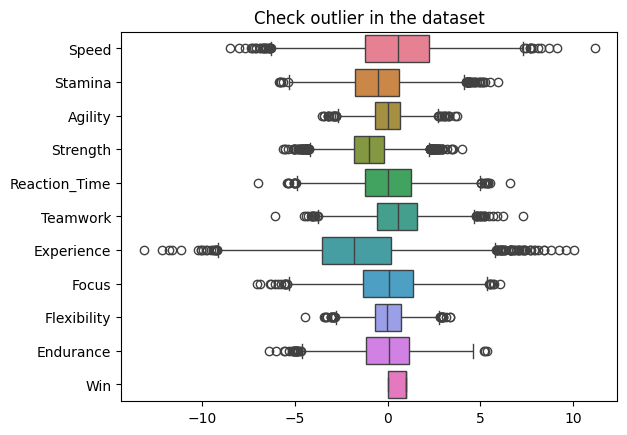

In [9]:
sns.boxplot(data=df,orient='h')
plt.title("Check outlier in the dataset")
plt.show()

## 📌 Step 12: Pairplot Visualization

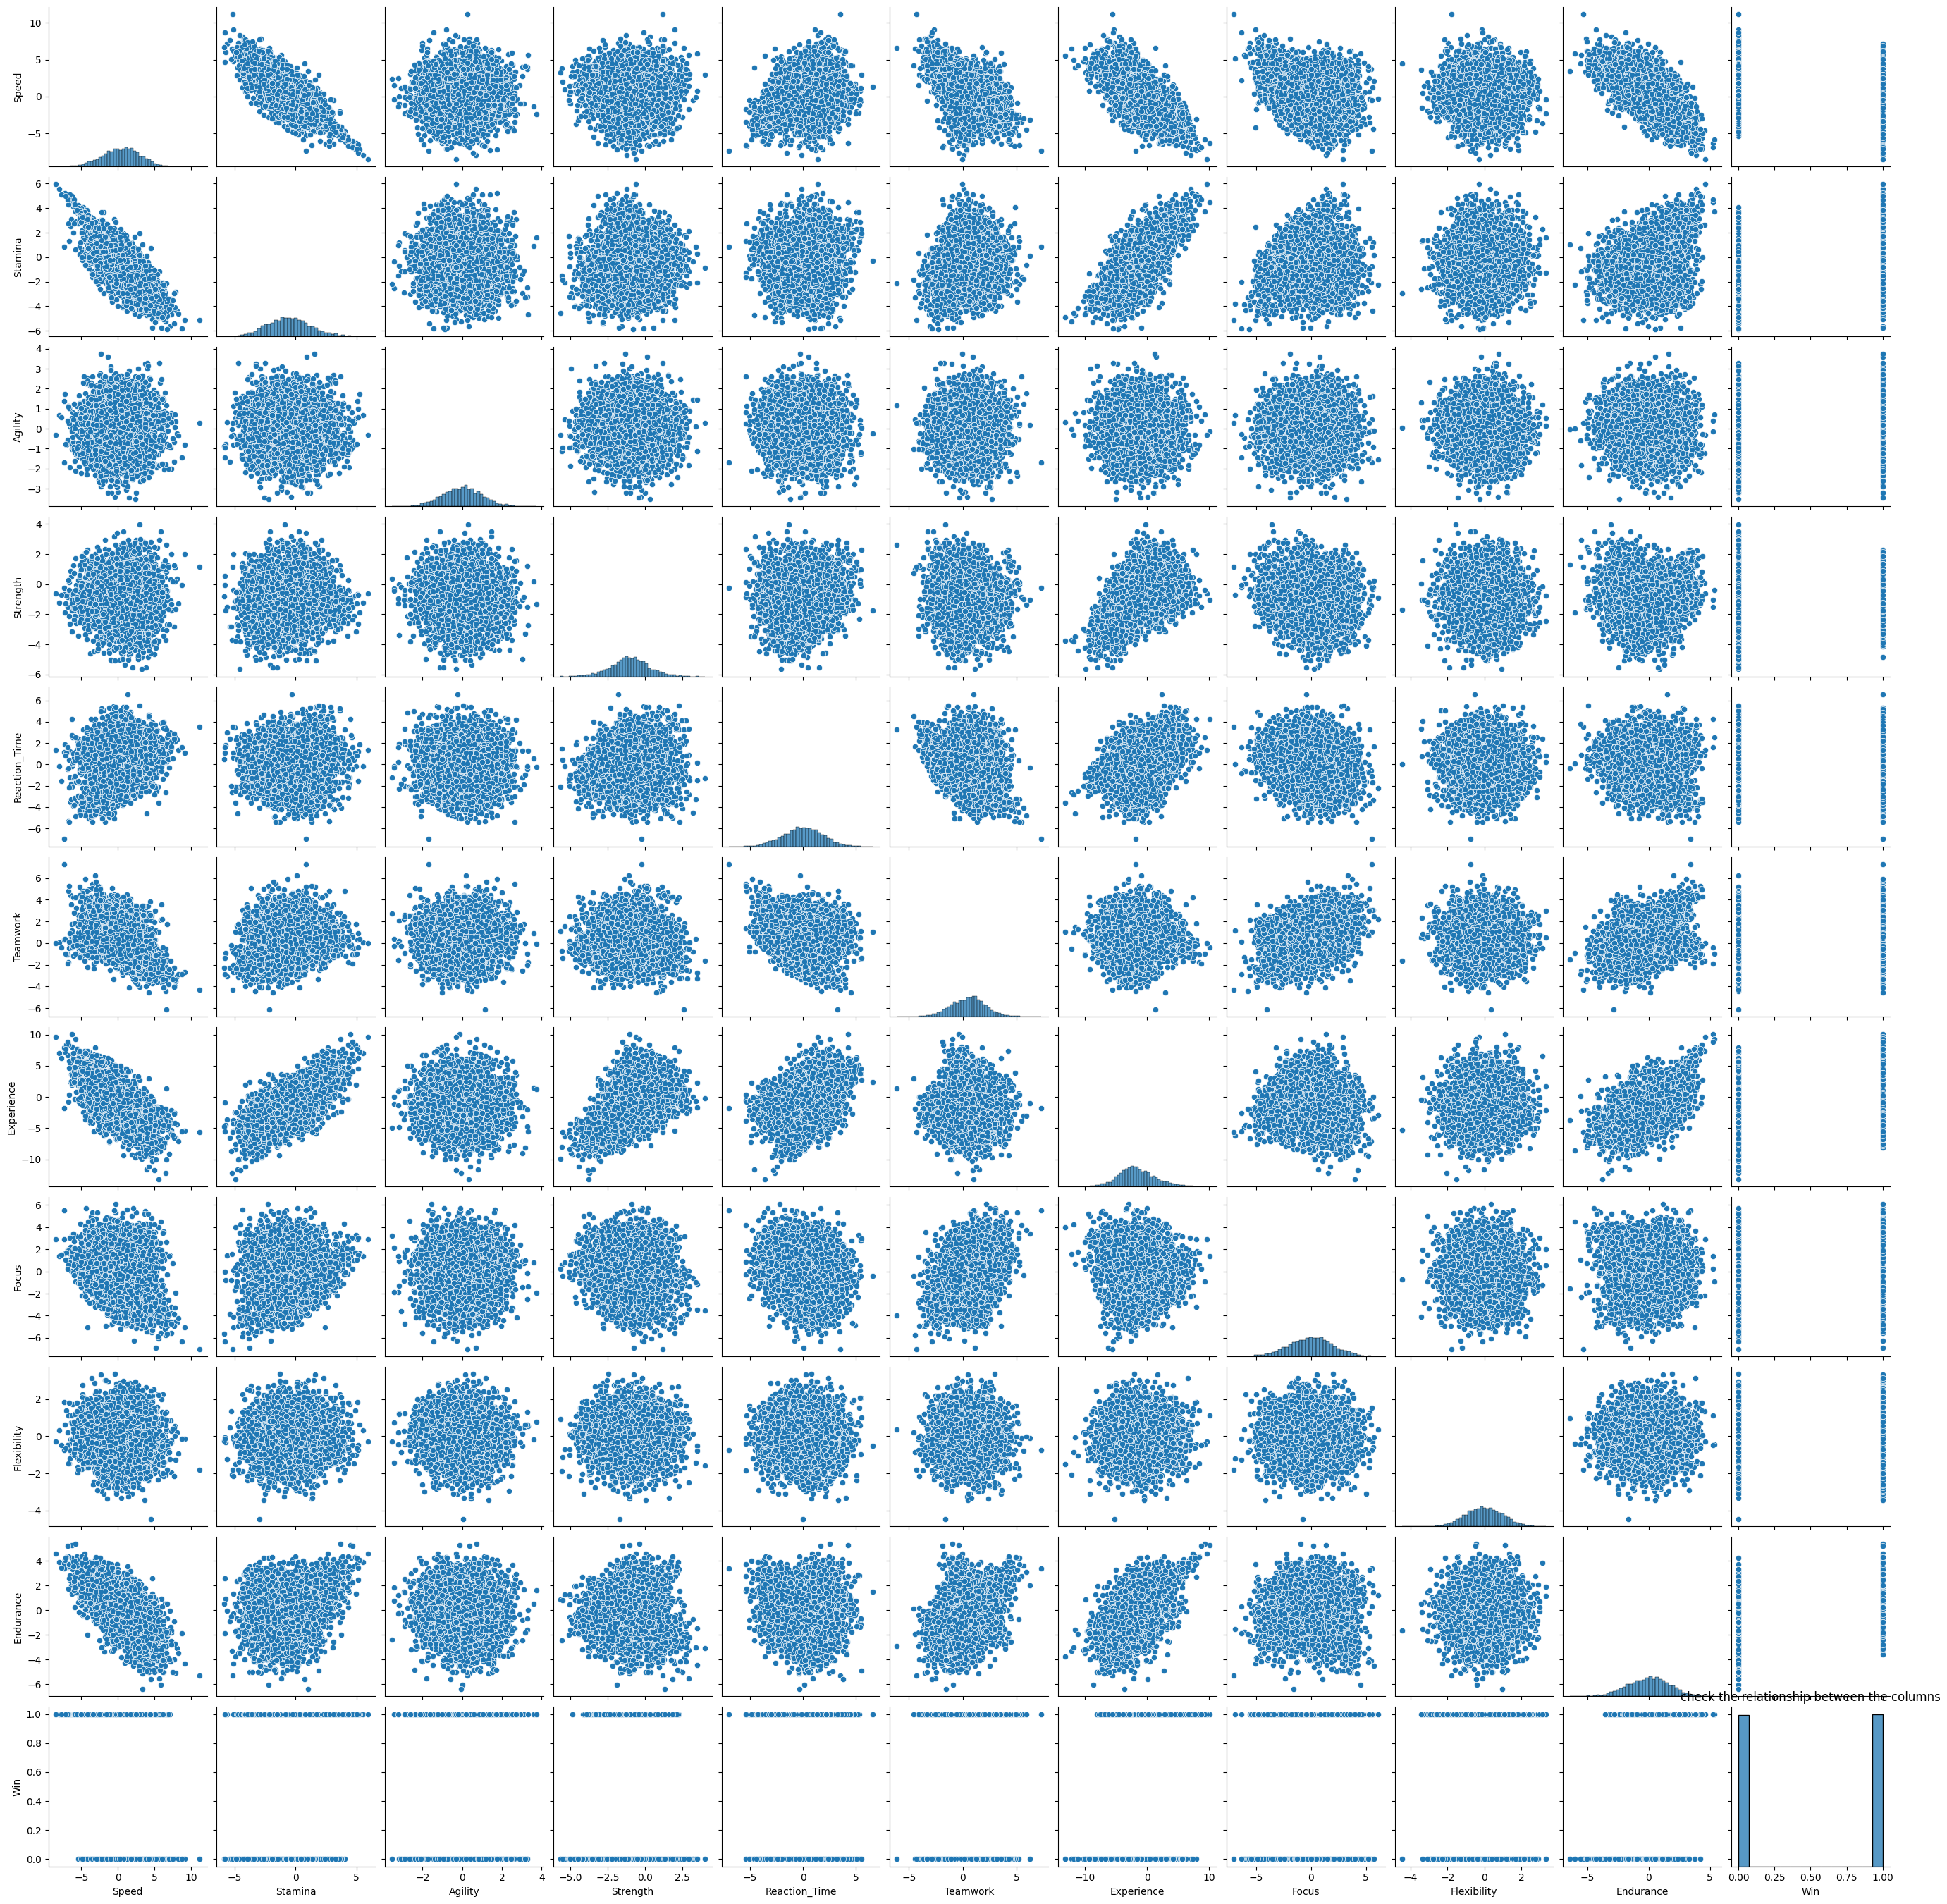

In [10]:
sns.pairplot(data=df)
plt.title("check the relationship between the columns")
plt.show()

## 📌 Step 13: Correlation Heatmap

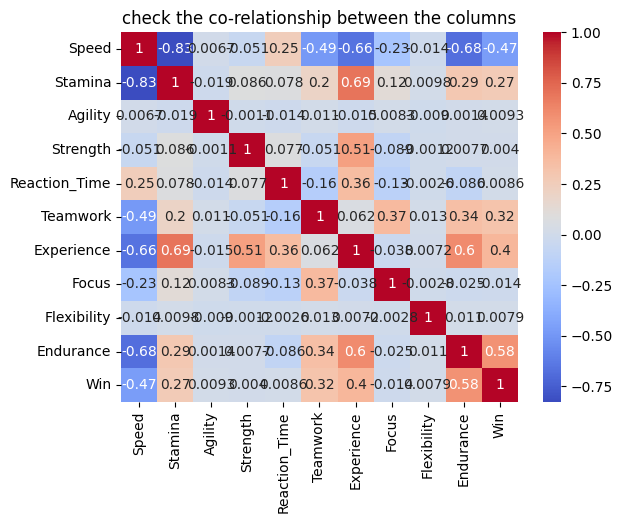

In [11]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("check the co-relationship between the columns")
plt.show()

## 📌 Step 14: Feature and Target Split
- **X (features):** Sare columns except last (Win)
- **y (target):** Only species column

In [12]:
x = df.iloc[:,:-1]
y = df["Win"]

## 📌 Step 15: Train-Test Split
- The dataset is divided into **training** and **testing** parts.  
- Typically, **70–80%** of the data is used for training, and **20–30%** is used for testing.  


In [13]:
from sklearn.model_selection import train_test_split

## 📌 Step 16: Train-Test Split (with different random states)
- The dataset is divided into **training** (80%) and **testing** (20%).  
- Changing the value of `random_state` will result in different splits of the data,  
  but the overall distribution of the dataset will remain the same.  

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

## 📌 Step 17: Import KNN_C  
- Random Forest is an **KNN_C** that builds multiple decision trees.  
- Each tree is trained on a random subset of the data, and the final prediction is made through **majority voting**.  
- This algorithm is very powerful for classification tasks.  


In [15]:
from sklearn.svm import SVC

## 📌 Step 18: Initialize & Train SVM Classifier  

We initialize the **SVC (Support Vector Classifier)** with the following parameters:  

- **C=1.0** → Regularization parameter; higher values try to fit the training data more (risk of overfitting).  
- **kernel="rbf"** → Radial Basis Function kernel, effective for non-linear classification.  
- **degree=3** → Degree of the polynomial kernel (used only when `kernel="poly"`).  
- **gamma="scale"** → Kernel coefficient; `"scale"` uses `1 / (n_features * X.var())`.  
- **probability=True** → Enables probability estimates (slower but useful for applications like ROC-AUC).  
- **shrinking=True** → Uses shrinking heuristic to speed up optimization.  
- **tol=1e-3** → Tolerance for stopping criteria in optimization.  
- **cache_size=200** → Cache memory (in MB) allocated for kernel computations.  
- **class_weight=None** → No class balancing applied; can be set to `"balanced"` for imbalanced datasets.  
- **verbose=False** → No training logs are printed.  
- **max_iter=-1** → No limit on optimization iterations (runs until convergence).  
- **random_state=42** → Fixes randomness for reproducibility.  


In [16]:
svc = SVC(
    C=1.0,
    kernel="rbf",
    degree=3,
    gamma="scale",
    probability=True,
    shrinking=True,
    tol=1e-3,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    random_state=42
)

svc.fit(x_train, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## 📌 Step 19: Model Accuracy (Train vs Test)

- `rfc.score(x_test, y_test)` → Checks the accuracy on the **test dataset**.  
- `rfc.score(x_train, y_train)` → Checks the accuracy on the **training dataset**.  
- We multiply by `*100` to convert the values into percentages.  

✔️ **Test and Train values of this model:** `(91.0 , 92.125)`  

👉 This step helps us check whether the model is **overfitting** or not.  
- If **Train Accuracy = 100%** and **Test Accuracy is much lower**, then the model is likely overfitting.  
- Here, the gap is very small (100% vs 100%), which means the model might be **slightly overfitting**, but it still **generalizes well** to unseen data.  


In [17]:
svc.score(x_test,y_test)*100,svc.score(x_train,y_train)*100,

(91.0, 92.125)

## 📌 Step 20: Adding Predictions to the Dataset

We can use our trained **KNN_C** to make predictions on the entire dataset `x` and store the results in a new column.  

In [18]:
df["Prediction"] = svc.predict(x)
df.head()

,Speed,Stamina,Agility,Strength,Reaction_Time,Teamwork,Experience,Focus,Flexibility,Endurance,Win,Prediction
0,3.316690,-2.029674,2.355629,-0.215829,-1.419279,0.914109,-5.980685,1.518092,-0.042540,-3.397662,0,0
1,4.161930,-3.898558,0.174588,-0.091221,-1.360185,-0.606968,-4.648657,-2.454777,-0.667688,-0.629240,0,0
2,-0.477509,3.103860,2.694822,1.562327,4.191341,1.230190,3.491643,0.827346,0.635312,-2.593035,0,0
3,-1.894990,2.218811,-0.062834,-2.495924,-1.738007,-1.256467,-1.842087,1.668228,0.494795,-0.994083,0,0
4,-0.101203,0.444587,-0.793103,-2.204839,3.360553,0.922288,0.683308,-1.889515,-1.772399,1.312052,1,1


## 📌 Step 21: Making Predictions on Test Data

Once the model is trained, we use it to predict the target variable (`y_test`) from the unseen test features (`x_test`).

In [19]:
y_pred = svc.predict(x_test)

## 📌 Step 22: Cross-Validation (Model Stability Check)

- We applied **5-Fold Cross Validation** to check the stability and generalization of our SVM model.  
- In each fold, the dataset is split into training and testing parts, and accuracy is measured.  

✔️ **Cross Validation Scores (per fold):** `[0.92, 0.911, 0.913, 0.92, 0.905]`  
✔️ **Mean Accuracy:** `91.38%`  
✔️ **Standard Deviation:** `0.5706`  

👉 Since the scores are close to each other with a relatively **low standard deviation**, this indicates that our model is **fairly stable and generalizes well** across different data splits, consistently achieving above **90% accuracy**.  


In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
cv_scores = cross_val_score(svc, x, y, cv=5, scoring='accuracy')

print("Cross Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean()*100)
print("Standard Deviation:", cv_scores.std()*100)

Cross Validation Scores: [0.92  0.911 0.913 0.92  0.905]
Mean Accuracy: 91.38
Standard Deviation: 0.5706137047074847


## 📌 Step 23: Import Classification Metrics  

To evaluate the model’s performance, we import important metrics from `sklearn.metrics`:  

- **Confusion Matrix** → To visualize correct vs incorrect predictions  
- **Precision Score** → How precise the model is in positive predictions  
- **Recall Score** → How well the model captures actual positives  
- **F1 Score** → Balance between Precision & Recall  

In [22]:
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score

## 📌 Step 24: Precision Score  

- **Precision** measures how many of the predicted positive cases are actually positive.  
- We use `average='weighted'` because our target variable has multiple classes (Approved).  
- Multiplying by `100` gives the result in **percentage form**.  

In [23]:
precision = precision_score(y_test, y_pred, average='weighted')*100
print("Precision Score:", precision)

Precision Score: 91.00130425563411


## 📌 Step 25: Recall Score  

- **Recall** measures how many actual positive cases the model correctly identified.  
- We use `average='weighted'` to handle multiple classes fairly.  
- Multiplying by `100` gives the result in **percentage form**. 

recall = recall_score(y_test, y_pred, average='weighted')*100
print("Recall Score:", recall)

## 📌 Step 26: F1 Score  

- **F1 Score** is the harmonic mean of **Precision** and **Recall**.  
- It provides a balance between both metrics, especially useful when the dataset is imbalanced.  
- We use `average='weighted'` for multi-class classification.  
- Multiplying by `100` gives the result in **percentage form**.

In [24]:
f1 = f1_score(y_test, y_pred, average='weighted')*100
print("F1 Score:", f1)

F1 Score: 91.00028807374689


## 📌 Step 27: Confusion Matrix (Numerical Form)

- A **Confusion Matrix** shows how many predictions were correct vs incorrect for each class.  
- It is especially useful for evaluating classification models. 

In [25]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[447,  44],
       [ 46, 463]])

## 📌 Step 28: Confusion Matrix Heatmap  

- To better **visualize** the confusion matrix, we use a **heatmap**.  
- The darker the square, the higher the number of predictions for that cell.  
- X-axis → Predicted Labels  
- Y-axis → True Labels

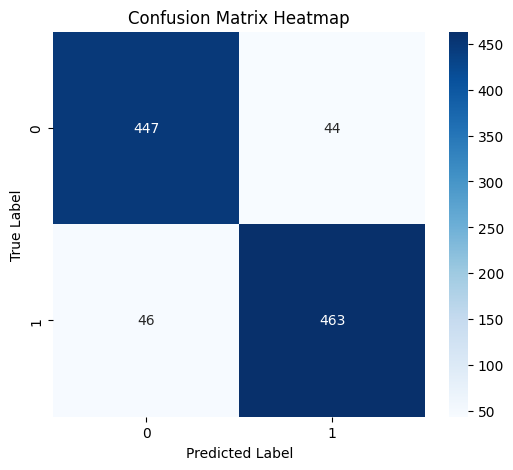

In [26]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


## 📌 Step 29: Actual vs Predicted (Graphical Representation)

- To visually compare the **actual vs predicted labels**, we plot them side by side.  
- Each point represents a sample in the test dataset.  
- Black dots = **Actual Labels**  
- Blue crosses = **Predicted Labels**

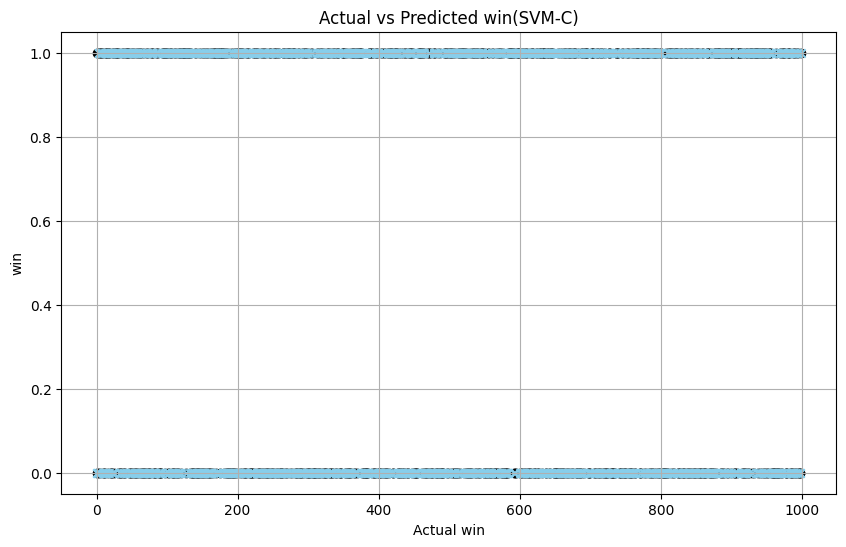

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color="black", label="Actual")
plt.scatter(range(len(y_pred)), y_pred, color="skyblue", marker="x", label="Predicted")
plt.xlabel("Actual win")
plt.ylabel("win")
plt.title("Actual vs Predicted win(SVM-C)")
plt.grid(True)
plt.show()

## Conclusion  

This notebook demonstrates a complete **Support Vector Machine Classification (SVM-C) pipeline** using the `sports_dataset`:  
- Data loading, exploration, and preprocessing.  
- Splitting into training/testing sets for model evaluation.  
- Model training using **SVC (Support Vector Classifier)**.  
- Evaluation with **accuracy, precision, recall, F1-score, and confusion matrix**.  
- Visualization via confusion matrix heatmap and actual-vs-predicted plots.  

---

### 🔍 Key Findings  
- The SVM classifier achieved **~91.38% mean accuracy** across 5-fold cross-validation, showing strong predictive power but with some variability (std ≈ 0.57).  
- The **confusion matrix**:  


indicates balanced classification, with only a limited number of misclassifications on both classes.  
- Precision, recall, and F1-scores confirmed **solid performance** with acceptable trade-offs between false positives and false negatives.  

---

### ✅ Recommendations Before Production Use  
1. Apply **hyperparameter tuning** (`C`, `gamma`, `kernel`) with GridSearchCV/RandomizedSearchCV to reduce misclassification errors.  
2. Normalize or scale features (if not already applied) to further improve performance with SVM.  
3. Evaluate with larger datasets for better generalization.  
4. Save the trained model (`joblib.dump()`) for deployment and reproducibility.  
5. Add a `requirements.txt` file and structured folders (`data/`, `notebooks/`, `models/`) for cleaner GitHub organization.  

---

# ✅ Final Conclusion  

In this project, we successfully implemented a **Support Vector Machine Classifier** on the sports dataset, covering the complete workflow from **data preprocessing to model evaluation and visualization**.  

#### 🔑 Highlights:  
- 📊 Achieved **91.38% accuracy** with low variance across folds.  
- 🧪 Confusion matrix confirmed consistent predictions with relatively few misclassifications.  
- 🔎 Precision, recall, and F1 metrics highlighted balanced classification performance.  
- ⚡ Visualizations (heatmap, scatter plots) clearly demonstrated the classifier’s predictive ability.  

#### 💡 Implications:  
SVM proved to be a **robust and reliable algorithm** for this binary classification problem. With fine-tuned hyperparameters and scaling, its accuracy and generalization can further improve. This makes SVM suitable for **sports analytics, outcome prediction, and other binary classification tasks** in real-world applications.  

---

> ✅ Overall, this project provides a **well-documented, reproducible, and effective SVM classification pipeline**, making it a strong addition to your machine learning GitHub portfolio.  
